In [1]:

# ---
# # Health Inequalities Proof of Concept
# 
# This notebook demonstrates how to merge the three final TabNet model outputs with patient demographic information, 
# and then create visualisations that may reveal health inequalities across different subpopulations. 
# Such insights can inform decision-makers on resource reallocation.

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots display within the notebook
%matplotlib inline

# ### 1. Configuration and Setup

# Paths - adjust as appropriate
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
DATA_DIR = os.path.join(PROJECT_ROOT, "Data")

# Raw patient demographics CSV
PATIENTS_CSV = os.path.join(DATA_DIR, "patients.csv")

# Final model outputs (clusters + predicted Health Index)
MODEL_OUTPUTS = {
    "combined_all_ckd_tabnet":    os.path.join(DATA_DIR, "finals", "combined_all_ckd_tabnet",    "combined_all_ckd_tabnet_clusters.csv"),
    "combined_diabetes_tabnet":   os.path.join(DATA_DIR, "finals", "combined_diabetes_tabnet",   "combined_diabetes_tabnet_clusters.csv"),
    "combined_none_tabnet":       os.path.join(DATA_DIR, "finals", "combined_none_tabnet",       "combined_none_tabnet_clusters.csv"),
}


In [2]:
# ### 2. Load Patient Data

print("Loading patient data from:", PATIENTS_CSV)
patients_df = pd.read_csv(PATIENTS_CSV)
print(f"Patients dataframe shape: {patients_df.shape}")
print("Columns:", list(patients_df.columns))

# For convenience, let's show the first few rows:
patients_df.head()

Loading patient data from: c:\Users\imran\Documents\VITAI\Data\patients.csv
Patients dataframe shape: (234458, 28)
Columns: ['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX', 'FIRST', 'MIDDLE', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTY', 'FIPS', 'ZIP', 'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE', 'INCOME']


,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,MIDDLE,LAST,...,CITY,STATE,COUNTY,FIPS,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
0,2237e2d6-4755-bef8-d3d5-c718f8a0d98e,2023-11-05,NaN,999-15-3366,NaN,NaN,NaN,Cammie978,Omega729,Hane680,...,Clinton,Massachusetts,Worcester County,25027.0,1510,42.394343,-71.695574,4681.49,142.36,167799
1,6865616f-0f82-ca17-f133-e14a9d220ee4,2015-08-28,NaN,999-29-5954,NaN,NaN,NaN,Artie871,Tanesha560,Heathcote539,...,Quincy,Massachusetts,Norfolk County,25021.0,2171,42.203594,-71.080844,17768.36,0.00,36182
2,4a425864-327f-9bce-8ee4-9a2dc7498eb5,2014-12-27,NaN,999-43-7550,NaN,NaN,NaN,Robby860,Robby860,Pagac496,...,Boston,Massachusetts,Suffolk County,25025.0,2120,42.341799,-71.136320,10064.69,5326.86,143562
3,1f370f41-c89b-e5ea-80b4-16462d29f73d,2008-10-05,NaN,999-95-3693,S99988255,NaN,NaN,Alfonzo975,Lemuel304,Monahan736,...,Lawrence,Massachusetts,Essex County,25009.0,1843,42.714080,-71.159641,34082.86,10990.01,40518
4,6f117f2d-2916-9866-258c-bf26cff3aefc,2008-12-28,NaN,999-62-8996,NaN,NaN,NaN,Rae910,Grisel924,Stroman228,...,Revere,Massachusetts,Suffolk County,25025.0,2151,42.433136,-70.978480,2816.47,43878.80,9458


In [3]:
# ### 3. Check Basic Demographics
# 
# We can briefly look at the distribution of race, ethnicity, income, etc. 
# This gives us a sense of the population we are working with.

print("\nBasic demographic overview:")
print("Race distribution:")
print(patients_df["RACE"].value_counts(dropna=False))
print("\nEthnicity distribution:")
print(patients_df["ETHNICITY"].value_counts(dropna=False))
print("\nGender distribution:")
print(patients_df["GENDER"].value_counts(dropna=False))



Basic demographic overview:
Race distribution:
RACE
white       193080
black        19861
asian        14991
hawaiian      2696
other         2675
native        1155
Name: count, dtype: int64

Ethnicity distribution:
ETHNICITY
nonhispanic    209009
hispanic        25449
Name: count, dtype: int64

Gender distribution:
GENDER
F    118134
M    116324
Name: count, dtype: int64


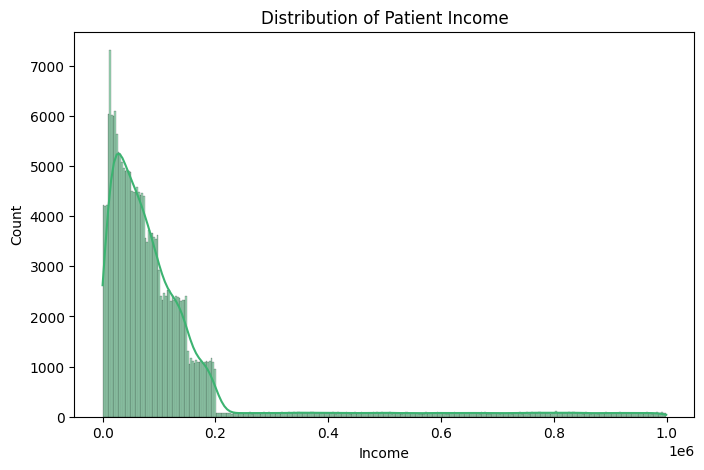

In [4]:
# ### 4. Visualise Basic Demographics

# A quick histogram of INCOME to see distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=patients_df, x="INCOME", kde=True, color="mediumseagreen")
plt.title("Distribution of Patient Income")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

In [5]:
# ### 5. Merge Each Model's Output

# Our final TabNet models produce CSVs with: "Id", "Predicted_Health_Index", "Cluster".
# We'll merge each with patients_df on "Id".

merged_dataframes = {}
for model_name, model_csv in MODEL_OUTPUTS.items():
    if not os.path.exists(model_csv):
        print(f"[WARNING] {model_name} output not found at {model_csv}, skipping.")
        continue
    
    print(f"\nLoading {model_name} from {model_csv}")
    df_model = pd.read_csv(model_csv)
    print(f"{model_name} shape:", df_model.shape)
    
    # Merge on Id
    df_merged = pd.merge(patients_df, df_model, on="Id", how="inner")
    merged_dataframes[model_name] = df_merged
    
    print(f"Merged {model_name} shape:", df_merged.shape)


Loading combined_all_ckd_tabnet from c:\Users\imran\Documents\VITAI\Data\finals\combined_all_ckd_tabnet\combined_all_ckd_tabnet_clusters.csv
combined_all_ckd_tabnet shape: (35666, 3)
Merged combined_all_ckd_tabnet shape: (35666, 30)

Loading combined_diabetes_tabnet from c:\Users\imran\Documents\VITAI\Data\finals\combined_diabetes_tabnet\combined_diabetes_tabnet_clusters.csv
combined_diabetes_tabnet shape: (107843, 3)
Merged combined_diabetes_tabnet shape: (107843, 30)

Loading combined_none_tabnet from c:\Users\imran\Documents\VITAI\Data\finals\combined_none_tabnet\combined_none_tabnet_clusters.csv
combined_none_tabnet shape: (234458, 3)
Merged combined_none_tabnet shape: (234458, 30)



## combined_all_ckd_tabnet: Visualising Predicted Health Index by Race and Ethnicity


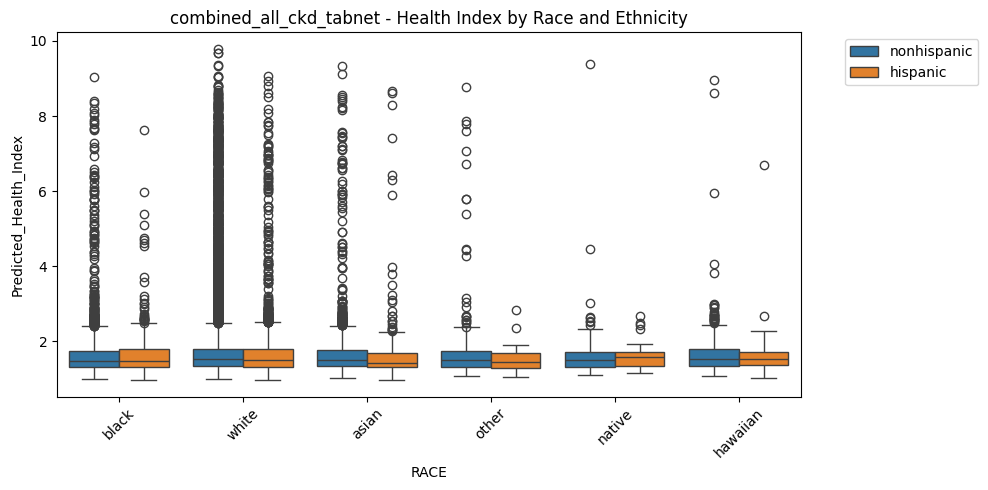


## combined_diabetes_tabnet: Visualising Predicted Health Index by Race and Ethnicity


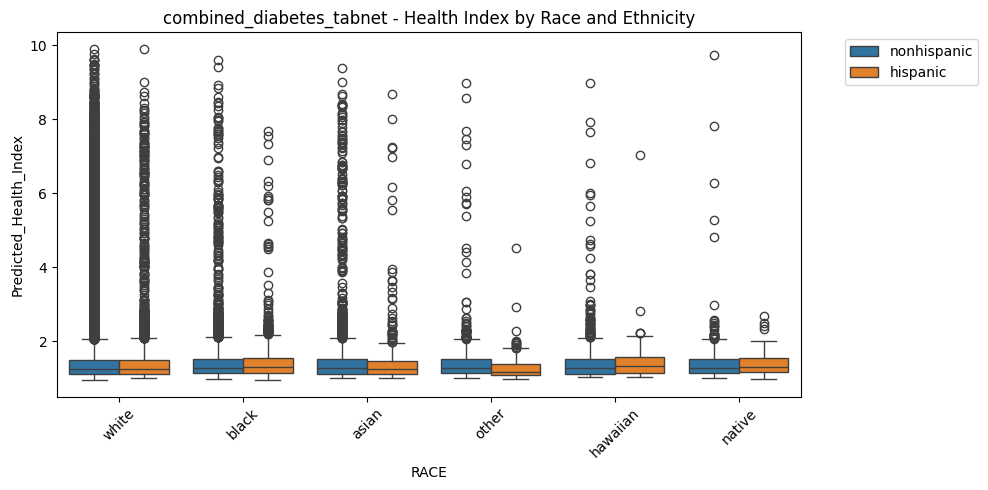


## combined_none_tabnet: Visualising Predicted Health Index by Race and Ethnicity


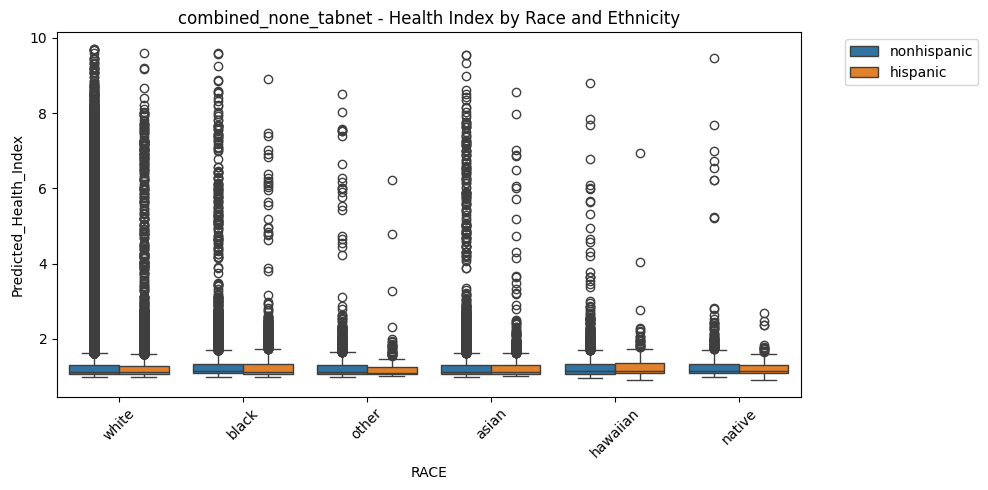

In [6]:
# ### 6. Visualisations to Explore Health Inequalities
# 
# We will create some example plots to illustrate how we might detect inequalities.

# #### 6.1 Distribution of Predicted Health Index by Race/Ethnicity
# 
# For each final model, we can boxplot or violinplot the predicted Health Index across different racial or ethnic groups.

for model_name, df_merged in merged_dataframes.items():
    print(f"\n## {model_name}: Visualising Predicted Health Index by Race and Ethnicity")
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_merged, x="RACE", y="Predicted_Health_Index", hue="ETHNICITY")
    plt.title(f"{model_name} - Health Index by Race and Ethnicity")
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


## combined_all_ckd_tabnet: Income vs. Predicted Health Index


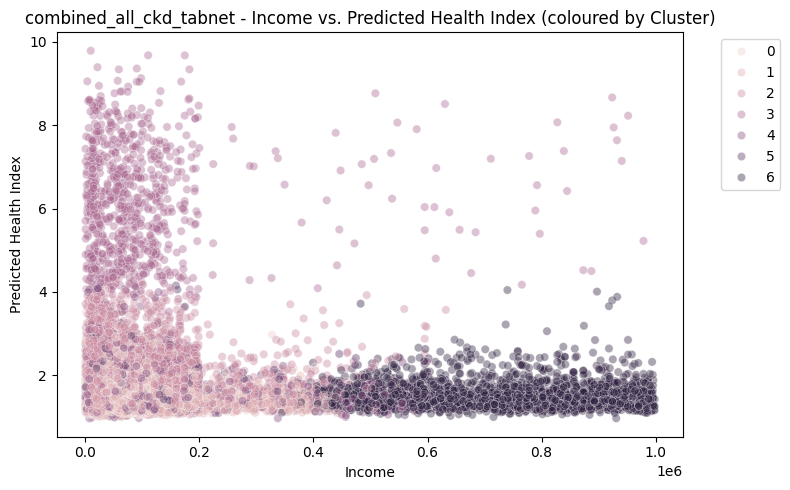

C:\Users\imran\AppData\Local\Temp\ipykernel_39464\2764024941.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_merged, x="IncomeBracket", y="Predicted_Health_Index", palette="rocket")


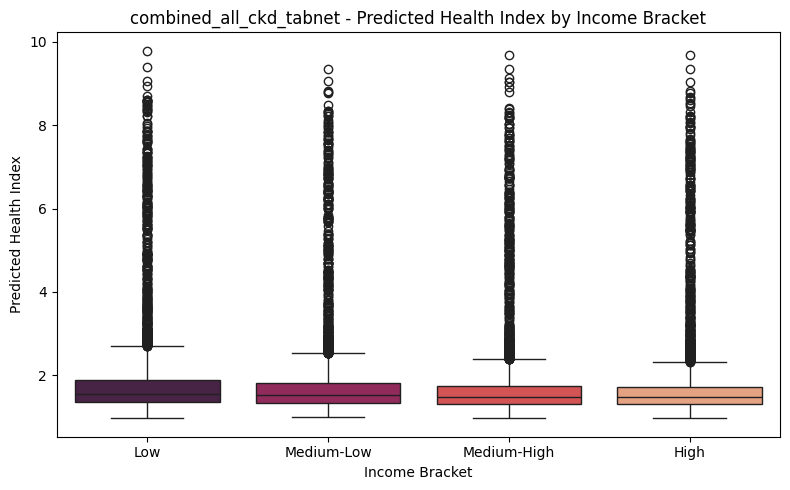


## combined_diabetes_tabnet: Income vs. Predicted Health Index


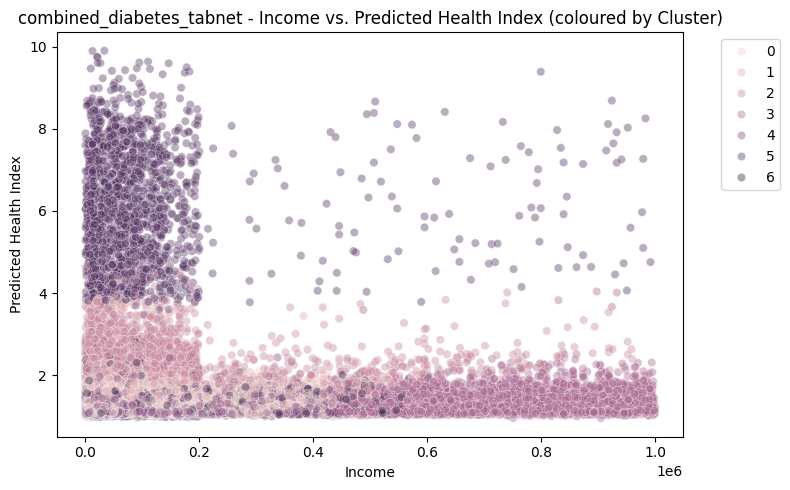

C:\Users\imran\AppData\Local\Temp\ipykernel_39464\2764024941.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_merged, x="IncomeBracket", y="Predicted_Health_Index", palette="rocket")


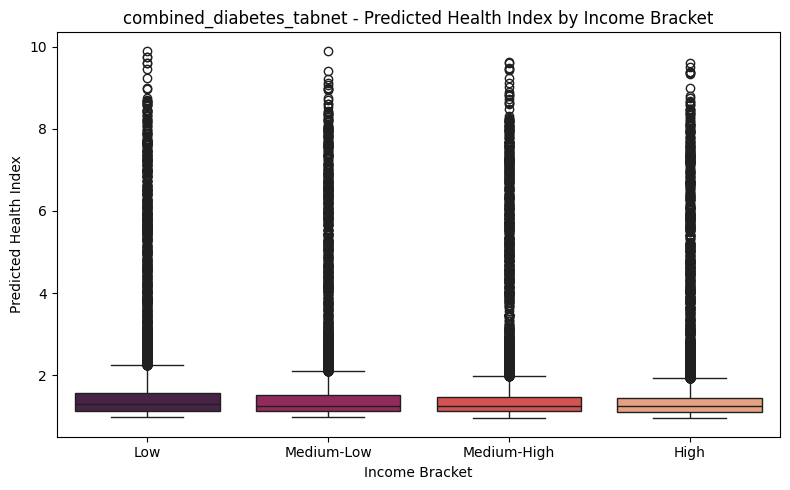


## combined_none_tabnet: Income vs. Predicted Health Index


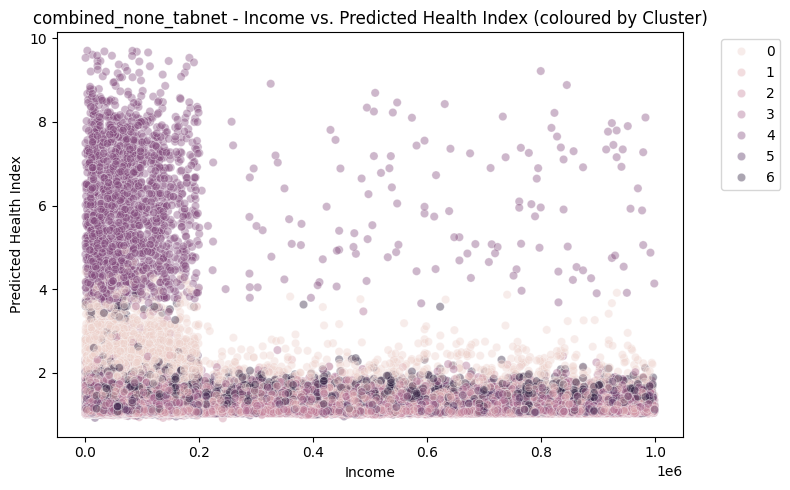

C:\Users\imran\AppData\Local\Temp\ipykernel_39464\2764024941.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_merged, x="IncomeBracket", y="Predicted_Health_Index", palette="rocket")


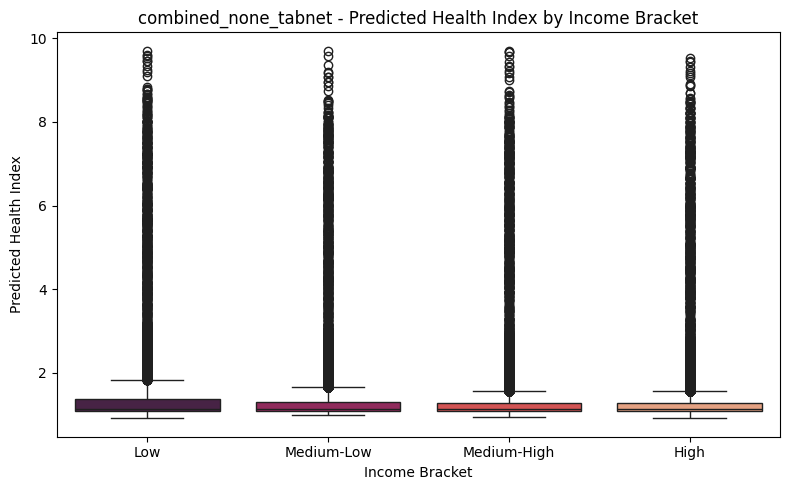

In [7]:
# #### 6.2 Investigate Income vs. Predicted Health Index
# 
# We can see if lower-income patients are showing higher severity or vice versa. 
# A simple scatterplot or a boxplot can help.

for model_name, df_merged in merged_dataframes.items():
    print(f"\n## {model_name}: Income vs. Predicted Health Index")
    
    # A scatterplot
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=df_merged, x="INCOME", y="Predicted_Health_Index", alpha=0.4, hue="Cluster")
    plt.title(f"{model_name} - Income vs. Predicted Health Index (coloured by Cluster)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel("Income")
    plt.ylabel("Predicted Health Index")
    plt.tight_layout()
    plt.show()
    
    # Alternatively, if you want to bin income
    df_merged["IncomeBracket"] = pd.qcut(df_merged["INCOME"], q=4, labels=["Low", "Medium-Low", "Medium-High", "High"])
    
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df_merged, x="IncomeBracket", y="Predicted_Health_Index", palette="rocket")
    plt.title(f"{model_name} - Predicted Health Index by Income Bracket")
    plt.xlabel("Income Bracket")
    plt.ylabel("Predicted Health Index")
    plt.tight_layout()
    plt.show()



## combined_all_ckd_tabnet: County-level Mean Health Index


,COUNTY,MeanHealthIndex
7,Hampshire County,1.763190
1,Berkshire County,1.751848
0,Barnstable County,1.747839
4,Essex County,1.722840
2,Bristol County,1.720036
6,Hampden County,1.719027
13,Worcester County,1.707240
9,Nantucket County,1.696028
3,Dukes County,1.692340
10,Norfolk County,1.691817


C:\Users\imran\AppData\Local\Temp\ipykernel_39464\1213479634.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=county_stats, y="COUNTY", x="MeanHealthIndex", palette="coolwarm")


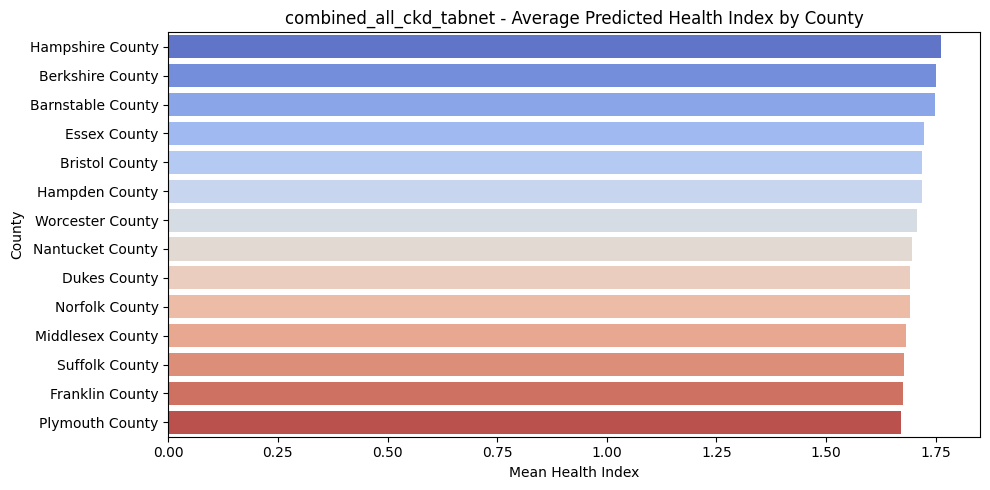


## combined_diabetes_tabnet: County-level Mean Health Index


,COUNTY,MeanHealthIndex
0,Barnstable County,1.486314
1,Berkshire County,1.463676
7,Hampshire County,1.459899
2,Bristol County,1.453748
6,Hampden County,1.453493
3,Dukes County,1.450792
4,Essex County,1.447485
13,Worcester County,1.434885
5,Franklin County,1.421366
11,Plymouth County,1.418431


C:\Users\imran\AppData\Local\Temp\ipykernel_39464\1213479634.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=county_stats, y="COUNTY", x="MeanHealthIndex", palette="coolwarm")


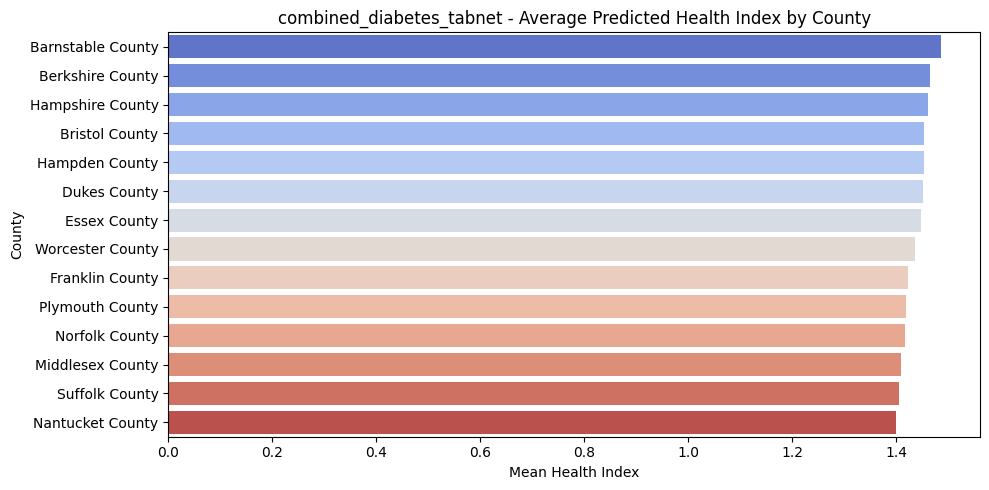


## combined_none_tabnet: County-level Mean Health Index


,COUNTY,MeanHealthIndex
0,Barnstable County,1.356534
3,Dukes County,1.323511
1,Berkshire County,1.320801
5,Franklin County,1.301192
2,Bristol County,1.298999
6,Hampden County,1.296046
4,Essex County,1.293989
13,Worcester County,1.281383
11,Plymouth County,1.281348
10,Norfolk County,1.277984


C:\Users\imran\AppData\Local\Temp\ipykernel_39464\1213479634.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=county_stats, y="COUNTY", x="MeanHealthIndex", palette="coolwarm")


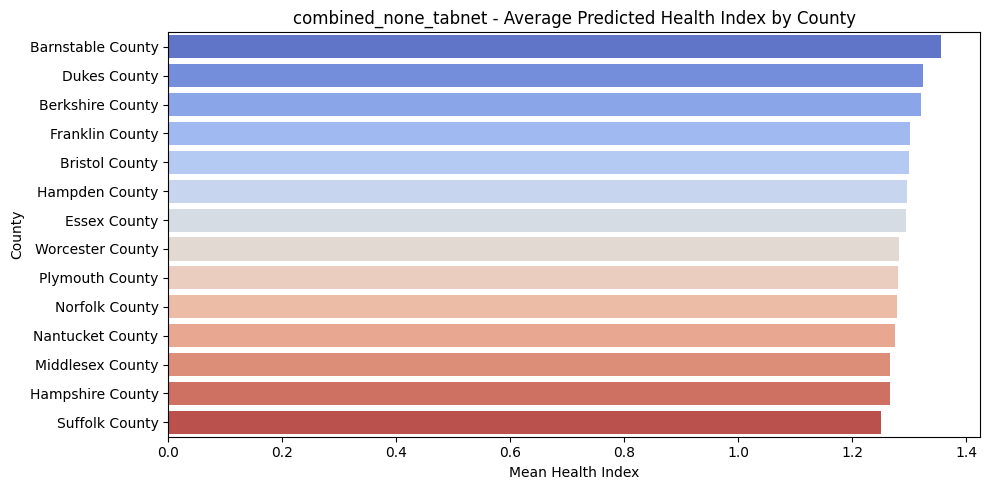

In [8]:
# #### 6.3 County-Level or Geographic Disparities
# 
# We could group by COUNTY or STATE, then compare average Predicted Health Index. 
# Decision-makers might see that certain counties have higher severity overall.

for model_name, df_merged in merged_dataframes.items():
    print(f"\n## {model_name}: County-level Mean Health Index")
    
    county_stats = (df_merged.groupby("COUNTY")["Predicted_Health_Index"].mean()
                    .reset_index(name="MeanHealthIndex")
                    .sort_values("MeanHealthIndex", ascending=False))
    display(county_stats.head(10))  # show top 10 counties with highest predicted severity
    
    # Barplot
    plt.figure(figsize=(10,5))
    sns.barplot(data=county_stats, y="COUNTY", x="MeanHealthIndex", palette="coolwarm")
    plt.title(f"{model_name} - Average Predicted Health Index by County")
    plt.ylabel("County")
    plt.xlabel("Mean Health Index")
    plt.tight_layout()
    plt.show()

In [9]:
# ---
# ### 7. Observations & Next Steps
# 
# In a real-world setting, you might:
# 
# 1. Drill down on specific subpopulations (e.g., black/Hispanic patients with lower incomes in a certain county) 
#    to see if they're disproportionately assigned higher severity.
# 2. Explore policy or resource interventions in those high-severity counties or for those with especially low incomes.
# 3. Combine further with admissions data, readmission rates, or hospital resource usage to see where inequalities manifest most severely.
# 
# This proof-of-concept notebook is intended to show how the final TabNet model outputs can be leveraged alongside 
# demographic data to reveal actionable insights about health inequalities.

print("\nAll visualisations completed. Consider refining further for interactive dashboards.")



All visualisations completed. Consider refining further for interactive dashboards.
